In [4]:
# message
# currently sticking to election oriented


In [5]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
# import nltk
# nltk.download('stopwords') #run once 
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

from emot.emo_unicode import UNICODE_EMOJI

In [7]:
from textblob import TextBlob

from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

In [8]:
import re

In [9]:
# not quite useful atleast in election oriented

# count_hash = {}
# count_at = {}

# def count_tags(tweet_text):
#     hash_tag = re.findall(r"#(\w+)", tweet_text)
#     at_tag = re.findall(r"@(\w+)", tweet_text)
    
#     if(len(hash_tag)!=0):
#         for i in hash_tag: 
#             if i not in count_hash.keys():
#                 count_hash[i] = 1
#             else:
#                 count_hash[i] += 1    
        
#         for i in at_tag: 
#             if i not in count_at.keys():
#                 count_at[i] = 1
#             else:
#                 count_at[i] += 1   
        

In [10]:
#change
query = "Donald Trump lang:en"

tweets_with_loc = []

tweets = []

fr = open("rejected_tweets_analysis.txt", "a")

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):   
    if i>500:
        break

    else:
        if(len(tweet.content.split()) >= 10): #why 10
            if str(tweet.user.location) != "" :
                tweets_with_loc.append(str(tweet.user.location))
            tweets.append([tweet.date, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount])
            # count_tags(tweet.content)
        else:
            fr.write(tweet.content + " " + str(len(tweet.content.split())) + "\n")
            # print(tweet.content, len(tweet.content.split()))

# print(tweets_with_loc) # 500 me se 284; with correct locations

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=Donald+Trump+lang%3Aen&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2Chig

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=Donald+Trump+lang%3Aen&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [10]:
df = pd.DataFrame(tweets, columns = ['date', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_retweet'])
df.to_csv('sentiment.csv')

# df = pd.read_csv("sentiment.csv")

In [22]:
# print(count_at)
# print()
# print(count_hash)

In [13]:
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

In [12]:
# def filtering(text):
#     text = text.lower()

#     text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    
#     tokens = word_tokenize(text)  
#     filtered_words = [w for w in tokens if w not in eng_stop_words]
#     filtered_words = [w for w in filtered_words if w not in emoji]

#     lemmatizer = WordNetLemmatizer() 
#     lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
#     text = " ".join(lemma_words)

#     return text

def filtering(text):
    # text = text.lower()

    # text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    # filtered_words = [w for w in filtered_words if w not in emoji]

    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)

    return text

#test
# filtering("@kvenkat1680 @SecularFringe @GemsOfBollywood Those will loss Who were faking despite of political alignments. As per Hindenberg, Adani manipulated &; used a fake assets scene and https://www.sdhvb.com he is getting rewards for his deeds, no surprise. As per your views the super hit movies are unable to stay on screen for more than two weeks. #Truth")


df['filtered_tweets'] = df['tweet'].apply(filtering)

In [18]:
polar = 0
pnn = [0, 0, 0]

def polarity(tweet):
    global polar, pos, neu, neg
    curr_pol = TextBlob(tweet).sentiment.polarity
    
    if curr_pol > 0 : pnn[0] += 1
    elif curr_pol == 0 : pnn[1] += 1
    else : pnn[2] += 1

    polar += curr_pol
    return curr_pol

df['polarity'] = df['filtered_tweets'].apply(polarity)
# df.head(20)


In [ ]:
df.to_csv('sentiment.csv', mode = 'w')

# df = pd.read_csv('sentiment.csv')

In [ ]:
# print("sentiment polarity : ", polar*100 / len(tweets))
print("percentage of positive tweets :", pnn[0]*100 / len(tweets))
print("percentage of neutral tweets :", pnn[1]*100 / len(tweets))
print("percentage of negative tweets :", pnn[2]*100 / len(tweets))

<BarContainer object of 3 artists>

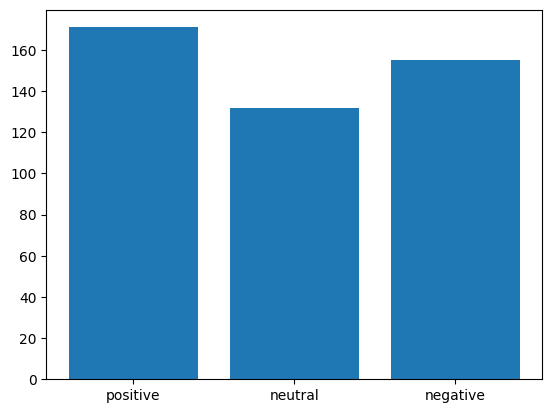

In [21]:
# problem : on scale of hundread polarity is not mattering !?

# emojis express a lot @@
# filtered tweets me emojis?

# subjectivity

# graphs 

# positive neutral and negative tweets for trump vs biden
x_axis = ["positive", "neutral", "negative"]

plt.bar(x_axis, pnn)


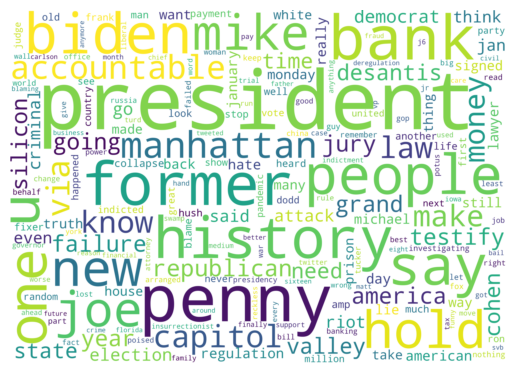

In [37]:
tweets_string = df['filtered_tweets'].tolist()
tweets_string = " ".join(tweets_string)

tweets_list = tweets_string.split()

#change
words_not_to_include = ["donald", "trump"]

tweets_list = [i for i in tweets_list if (i not in words_not_to_include)]

tweets_string = " ".join(tweets_list)

w_cloud = WordCloud(collocations = False, max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# can get hint of concerns of people